In [1]:
from __future__ import print_function
import sys, os, math
import h5py
import numpy as np
from scipy import io
from scipy import signal
import matplotlib.pyplot as plt
import matplotlib
%matplotlib inline
import seaborn as sns
sns.set_style('dark')
sns.set_context('talk')
import malis

/groups/turaga/home/turagas/anaconda/lib/python2.7/site-packages/matplotlib/__init__.py:872: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


In [2]:
# Load PyGreentea
# Relative path to where PyGreentea resides
pygt_path = '../PyGreentea'
sys.path.append(pygt_path)
import PyGreentea as pygt

In [12]:
def loadloss(fname,factor):
    if os.path.isfile(fname):
        m=io.loadmat(fname)
        m['loss']=m['loss'][:,1:].reshape((-1,factor))
        m['t'] = np.arange(1,1+m['loss'].shape[0])*factor
        return m

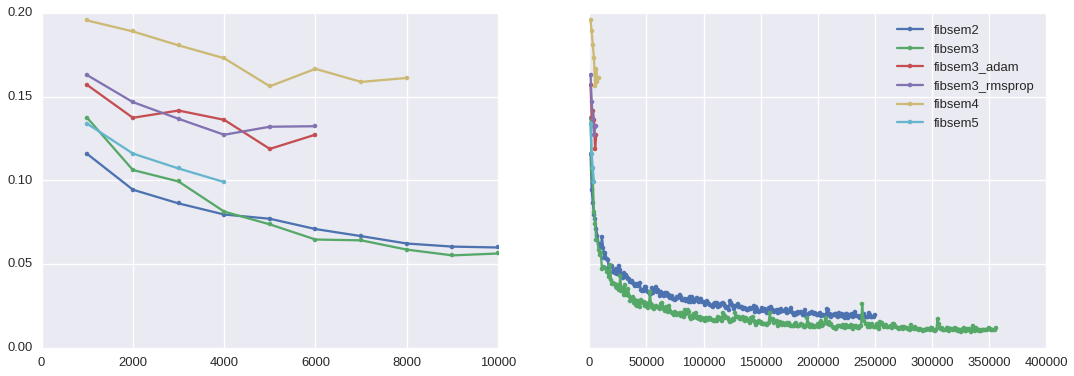

In [29]:
factor=1000
fs = ['fibsem2/loss.mat',
      'fibsem3/loss.mat',
      'fibsem3_adam/loss.mat',
      'fibsem3_rmsprop/loss.mat',
      'fibsem4/loss.mat',
      'fibsem5/loss.mat',
     ]

ms = [loadloss(f,factor) for f in fs]
legstr = [os.path.split(f)[0] for f in fs]

f, (ax1, ax2) = plt.subplots(1, 2, sharey=True, figsize=(18,6));
for m in ms:
    ax1.plot(m['t'],np.mean(m['loss'],axis=1),'.-');
ax1.grid();
ax1.set_xlim((0,10000));
for m in ms:
    ax2.plot(m['t'],np.mean(m['loss'],axis=1),'.-');
ax2.grid();
ax2.legend(legstr);